In [1]:
import sys, os, imp
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import lambda2nu, nu2lambda, c

In [2]:
lumapiFile =  "C:\\Program Files\\Lumerical\\v212\\api\\python\\lumapi.py"
lumapi   = imp.load_source("lumapi", lumapiFile)

In [3]:
# Arquivo de Simulação
modeFile = "converter_optimization_1550_nm.lms"
mode  = lumapi.MODE(modeFile)

In [4]:
lambd_min = 1.520e-6;
lambd_max = 1.580e-6;
emepoints = 100;
group_delay = 1;

mode.setemeanalysis("wavelength sweep",1);
mode.setemeanalysis("start wavelength", lambd_min);
mode.setemeanalysis("stop wavelength", lambd_max);
mode.setemeanalysis("calculate group delays", group_delay);
mode.setemeanalysis("number of wavelength points", emepoints);
mode.emesweep("wavelength sweep");
mode.emepropagate();

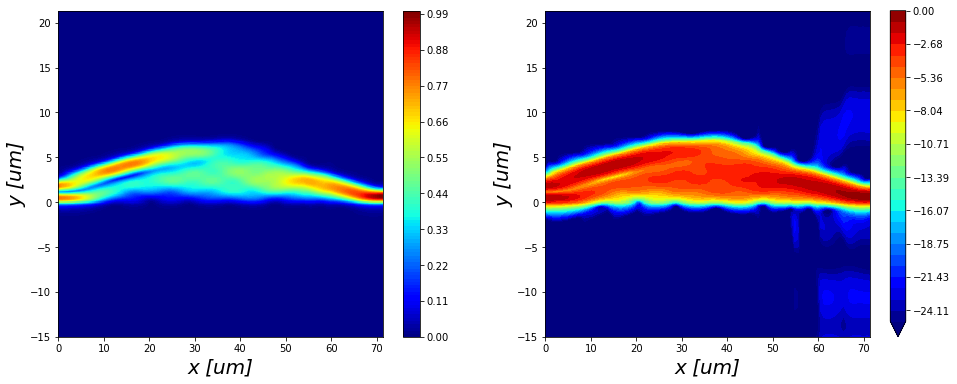

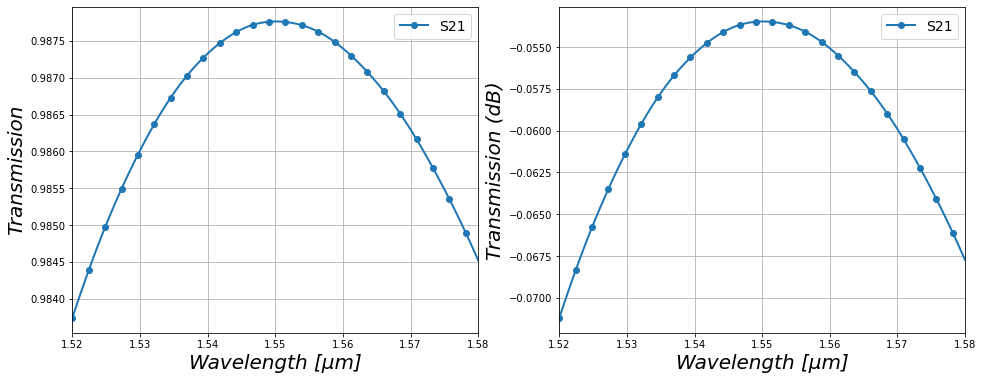

In [7]:
E = mode.getresult("monitor","field profile");
niveis = np.linspace(-25, 0, num = 29);

lambd = E['lambda'];

x = E['x']
x = x[:,0]
y = E['y']
y = y[:,0]
z = E['z']

E = E['E']

Ex = E[:,:,0,:,0]
Ey = E[:,:,0,:,1]
Ez = E[:,:,0,:,2]

Emag = np.sqrt(np.abs(Ex)**2 + np.abs(Ey)**2 + np.abs(Ez)**2)
Emag = Emag/Emag.max()
logE = 10*np.log10(np.transpose(Emag[:,:,0]))

fig, axs = plt.subplots(1, 2, figsize=(16,6))
mycmap = plt.get_cmap('jet')

img1 = axs[0].contourf(1e6*x,1e6*y,np.transpose(Emag[:,:,0]),100,cmap = mycmap);
fig.colorbar(img1, ax=axs[0])
#axs[0].set_title('Field profile',fontsize = 16,fontstyle = 'oblique')
axs[0].set_xlabel('x [um]',fontsize = 20, fontstyle = 'oblique')
axs[0].set_ylabel('y [um]',fontsize = 20, fontstyle = 'oblique')

img2 = axs[1].contourf(1e6*x,1e6*y,logE,100,cmap = mycmap, levels = niveis, extend = 'min')
fig.colorbar(img2, ax=axs[1])
#axs[1].set_title('Field profile (dB)',fontsize = 16,fontstyle = 'oblique')
axs[1].set_xlabel('x [um]',fontsize = 20, fontstyle = 'oblique')
axs[1].set_ylabel('y [um]',fontsize = 20, fontstyle = 'oblique')

S_matrix = mode.getemesweep("S_wavelength_sweep");
lambd = S_matrix['wavelength'];
S11   = np.abs(S_matrix['s11'])**2;
S21   = np.abs(S_matrix['s21'])**2;

fig, axs = plt.subplots(1, 2, figsize=(16,6))
mycmap = plt.get_cmap('jet')

#axs[0].plot(1e6*lambd, S11, linewidth=2,label = 'S11');
axs[0].plot(1e6*lambd, S21, 'o-', markevery=4, linewidth=2,label = 'S21');
axs[0].set_xlim(1.52,1.58)
axs[0].set_xlabel('Wavelength [μm]', fontsize=20.0, fontstyle='oblique')
axs[0].set_ylabel('Transmission', fontsize=20.0, fontstyle='oblique')
axs[0].legend(loc='upper right', fontsize=14.0)
axs[0].grid(True)

#axs[1].plot(1e6*lambd, 10*np.log10(S11), linewidth=2,label = 'S11');
axs[1].plot(1e6*lambd, 10*np.log10(S21), 'o-', markevery=4, linewidth=2,label = 'S21');
axs[1].set_xlim(1.52,1.58)
axs[1].set_xlabel('Wavelength [μm]', fontsize=20.0, fontstyle='oblique')
axs[1].set_ylabel('Transmission (dB)', fontsize=20.0, fontstyle='oblique')
axs[1].legend(loc='upper right', fontsize=14.0)
axs[1].grid(True)

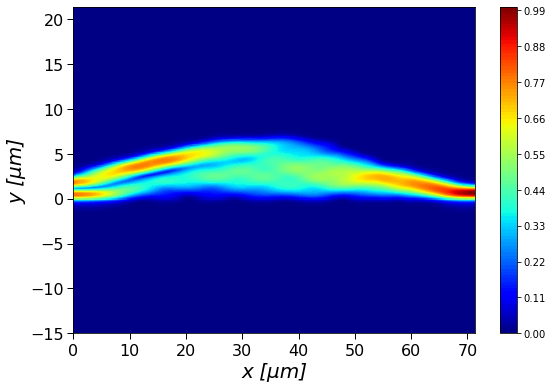

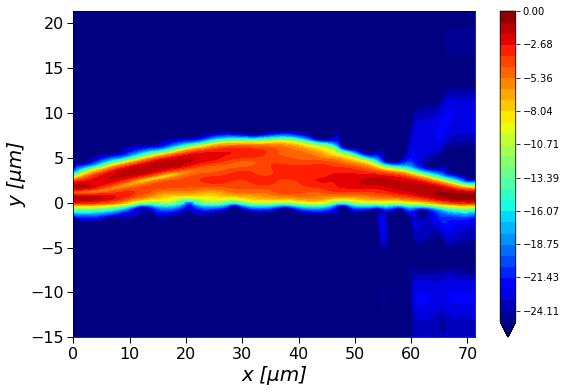

In [10]:
#%% Perfil de Campo

E = mode.getresult("monitor","field profile");
niveis = np.linspace(-25, 0, num = 29);

lambd = E['lambda'];

x = E['x']
x = x[:,0]
y = E['y']
y = y[:,0]
z = E['z']

E = E['E']

Ex = E[:,:,0,:,0]
Ey = E[:,:,0,:,1]
Ez = E[:,:,0,:,2]
Emag = np.sqrt(np.abs(Ex)**2 + np.abs(Ey)**2 + np.abs(Ez)**2)
Emag = Emag/Emag.max()

plt.figure(figsize=(9,6))
mycmap = plt.get_cmap('jet')

plt.contourf(1e6*x,1e6*y,np.transpose(Emag[:,:,0]),100,cmap = mycmap)
#plt.title('Field profile - 2x2 MMI',fontsize = 16,fontstyle = 'oblique')
plt.ylabel('y [μm]',fontsize = 20, fontstyle = 'oblique')
plt.xlabel('x [μm]',fontsize = 20, fontstyle = 'oblique')
plt.yticks(fontsize=16.0)
plt.xticks(fontsize=16.0)
plt.tick_params(direction='out', length=6, width=1);
plt.colorbar()
plt.show()

plt.figure(figsize=(9,6))
mycmap = plt.get_cmap('jet')

logE = 10*np.log10(np.transpose(Emag[:,:,0]))
mycmap = plt.get_cmap('jet')
plt.contourf(1e6*x,1e6*y,logE,100,cmap = mycmap, levels = niveis, extend = 'min')
#plt.title('Field profile (dB) - 2x2 MMI',fontsize = 16,fontstyle = 'oblique')
plt.ylabel('y [μm]',fontsize = 20, fontstyle = 'oblique')
plt.xlabel('x [μm]',fontsize = 20, fontstyle = 'oblique')
plt.yticks(fontsize=16.0)
plt.xticks(fontsize=16.0)
plt.tick_params(direction='out', length=6, width=1);
plt.colorbar()
plt.show()

In [ ]:
S_matrix = mode.getemesweep("S_wavelength_sweep");
lambd = S_matrix['wavelength'];
S11   = np.abs(S_matrix['s11'])**2;
S21   = np.abs(S_matrix['s21'])**2;

fig, axs = plt.subplots(1, 2, figsize=(16,6))
mycmap = plt.get_cmap('jet')

#axs[0].plot(1e6*lambd, S11, linewidth=2,label = 'S11');
axs[0].plot(1e6*lambd, S21, 'o-', markevery=4, linewidth=2,label = 'S21');
axs[0].set_xlim(1.52,1.58)
axs[0].set_xlabel('Wavelength [μm]', fontsize=20.0, fontstyle='oblique')
axs[0].set_ylabel('Transmission', fontsize=20.0, fontstyle='oblique')
axs[0].legend(loc='upper right', fontsize=14.0)
axs[0].grid(True)

#axs[1].plot(1e6*lambd, 10*np.log10(S11), linewidth=2,label = 'S11');
axs[1].plot(1e6*lambd, 10*np.log10(S21), 'o-', markevery=4, linewidth=2,label = 'S21');
axs[1].set_xlim(1.52,1.58)
axs[1].set_xlabel('Wavelength [μm]', fontsize=20.0, fontstyle='oblique')
axs[1].set_ylabel('Transmission (dB)', fontsize=20.0, fontstyle='oblique')
axs[1].legend(loc='upper right', fontsize=14.0)
axs[1].grid(True)

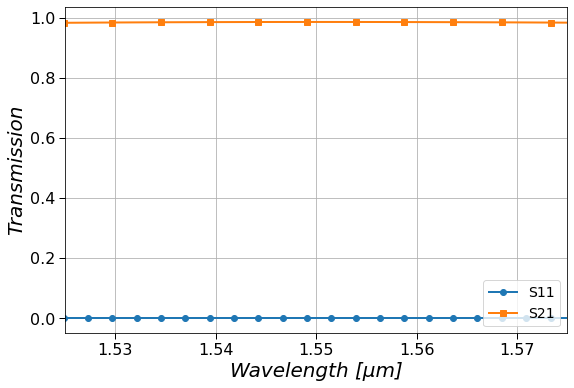

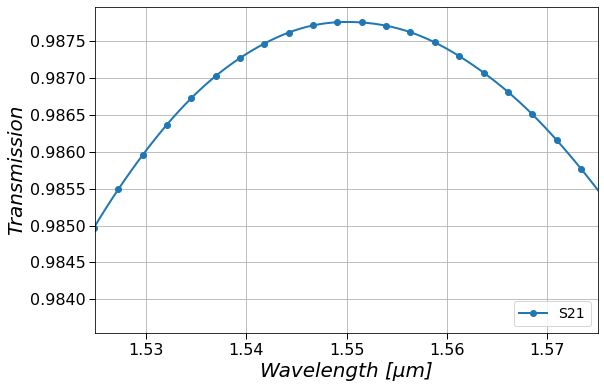

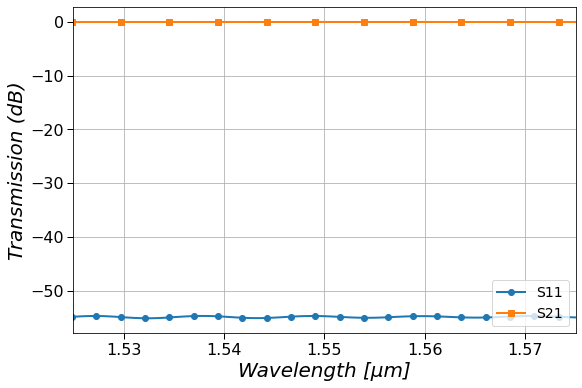

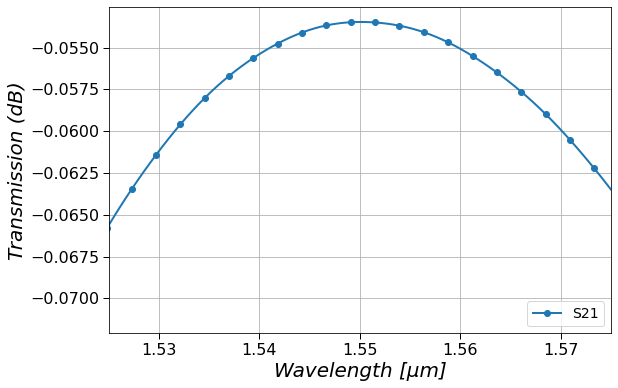

In [13]:
#%% Transmitância
S_matrix = mode.getemesweep("S_wavelength_sweep");
lambd = S_matrix['wavelength'];
S11   = np.abs(S_matrix['s11'])**2;
S21   = np.abs(S_matrix['s21'])**2;

plt.figure(figsize=(9,6))
plt.plot(1e6*lambd, S11, 'o-', markevery=4, linewidth=2,label = 'S11');
plt.plot(1e6*lambd, S21, 's-', markevery=8, linewidth=2,label = 'S21');
#plt.title('Transmission vs Wavelength - 2x2 MMI', fontsize=16.0, fontstyle='oblique')
plt.xlabel('Wavelength [μm]', fontsize=20.0, fontstyle='oblique')
plt.ylabel('Transmission', fontsize=20.0, fontstyle='oblique')
plt.yticks(fontsize=16.0)
plt.xticks(fontsize=16.0)
plt.tick_params(direction='out', length=6, width=1);
plt.xlim([1.525,1.575])
plt.legend(loc="lower right", fontsize=14.0);
plt.grid();
plt.show();

plt.figure(figsize=(9,6))
plt.plot(1e6*lambd, S21, 's-', markevery=4, linewidth=2,label = 'S21');
#plt.title('Transmission vs Wavelength - 2x2 MMI', fontsize=16.0, fontstyle='oblique')
plt.xlabel('Wavelength [μm]', fontsize=20.0, fontstyle='oblique')
plt.ylabel('Transmission', fontsize=20.0, fontstyle='oblique')
plt.yticks(fontsize=16.0)
plt.xticks(fontsize=16.0)
plt.tick_params(direction='out', length=6, width=1);
plt.xlim([1.525,1.575])
plt.legend(loc="lower right", fontsize=14.0);
plt.grid();
plt.show();

plt.figure(figsize=(9,6))
plt.plot(1e6*lambd, 10*np.log10(S11), 'o-', markevery=4, linewidth=2,label = 'S11');
plt.plot(1e6*lambd, 10*np.log10(S21), 's-', markevery=8, linewidth=2,label = 'S21');
#plt.title('Transmission (dB) vs Wavelength - 2x2 MMI', fontsize=16.0, fontstyle='oblique')
plt.xlabel('Wavelength [μm]', fontsize=20.0, fontstyle='oblique')
plt.ylabel('Transmission (dB)', fontsize=20.0, fontstyle='oblique')
plt.yticks(fontsize=16.0)
plt.xticks(fontsize=16.0)
plt.tick_params(direction='out', length=6, width=1);
plt.xlim([1.525,1.575])
plt.legend(loc="lower right", fontsize=14.0);
plt.grid();
plt.show();

plt.figure(figsize=(9,6))
plt.plot(1e6*lambd, 10*np.log10(S21), 's-', markevery=4, linewidth=2,label = 'S21');
#plt.title('Transmission (dB) vs Wavelength - 2x2 MMI', fontsize=16.0, fontstyle='oblique')
plt.xlabel('Wavelength [μm]', fontsize=20.0, fontstyle='oblique')
plt.ylabel('Transmission (dB)', fontsize=20.0, fontstyle='oblique')
plt.yticks(fontsize=16.0)
plt.xticks(fontsize=16.0)
plt.tick_params(direction='out', length=6, width=1);
plt.xlim([1.525,1.575])
plt.legend(loc="lower right", fontsize=14.0);
plt.grid();
plt.show();